In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.analysis.timeseries import iqnoise

In [2]:
npd150 = npy.NumpyDirectory('/data/detectors/2016-11-16_141202_sweep_stream_on_off_locked/')

In [3]:
plot_directory = '/home/flanigan/temp/'

In [4]:
def aac_s21_real_imag(ss):
    return iqnoise.auto_auto_cross(a=ss.s21_raw.real, b=ss.s21_raw.imag, sample_rate=ss.stream_sample_rate)

def coherence(aac):
    return np.abs(aac.S_ab)**2 / (aac.S_aa * aac.S_bb)

def analyze(ss):
    ss.s21_aac = aac_s21_real_imag(ss)
    ss.s21_coherence = coherence(ss.s21_aac)
    return ss

In [5]:
def plot_coherence_on_off(on_ss_list, off_ss_list, xlimits=(1e-1, 2e4), ylimits=(1e-3, 1.5), figsize=(4, 8),
                          num_channels=7, num_attenuations=4):
    fig, axes = plt.subplots(num_channels, num_attenuations, figsize=figsize)
    for channel in range(num_channels):
        for attenuation_index in range(num_attenuations):
            index = channel * num_attenuations + attenuation_index
            ax = axes[channel, attenuation_index]
            off_ss = off_ss_list[index]
            on_ss = on_ss_list[index]
            ax.loglog(off_ss.s21_aac.f, off_ss.s21_coherence, '-', color='black', label='off', alpha=0.5)
            ax.loglog(on_ss.s21_aac.f, on_ss.s21_coherence, '-', color='red', label='on', alpha=0.5)
            ax.set_xlim(*xlimits)
            ax.set_ylim(*ylimits)
            ax.tick_params(labelsize=4)
            if channel != num_channels - 1:
                ax.set_xticklabels([])
            if attenuation_index != 0:
                ax.set_yticklabels([])
    axes[num_channels - 1, 0].set_ylabel('coherence', fontsize=6)
    axes[num_channels - 1, 0].set_xlabel('frequency / Hz', fontsize=6)
    return fig, axes

In [6]:
num_channels = 7
num_attenuations = 2

# 150 mK

In [7]:
sss_150 = [npd150.read(name) for name in npd150.node_names() if name.startswith('SingleSweepStream')]
on_ss_150 = [analyze(sss.stream) for sss in sss_150]
off_ss_150 = [analyze(npd150.read(name)) for name in npd150.node_names() if name.startswith('SingleStream')]

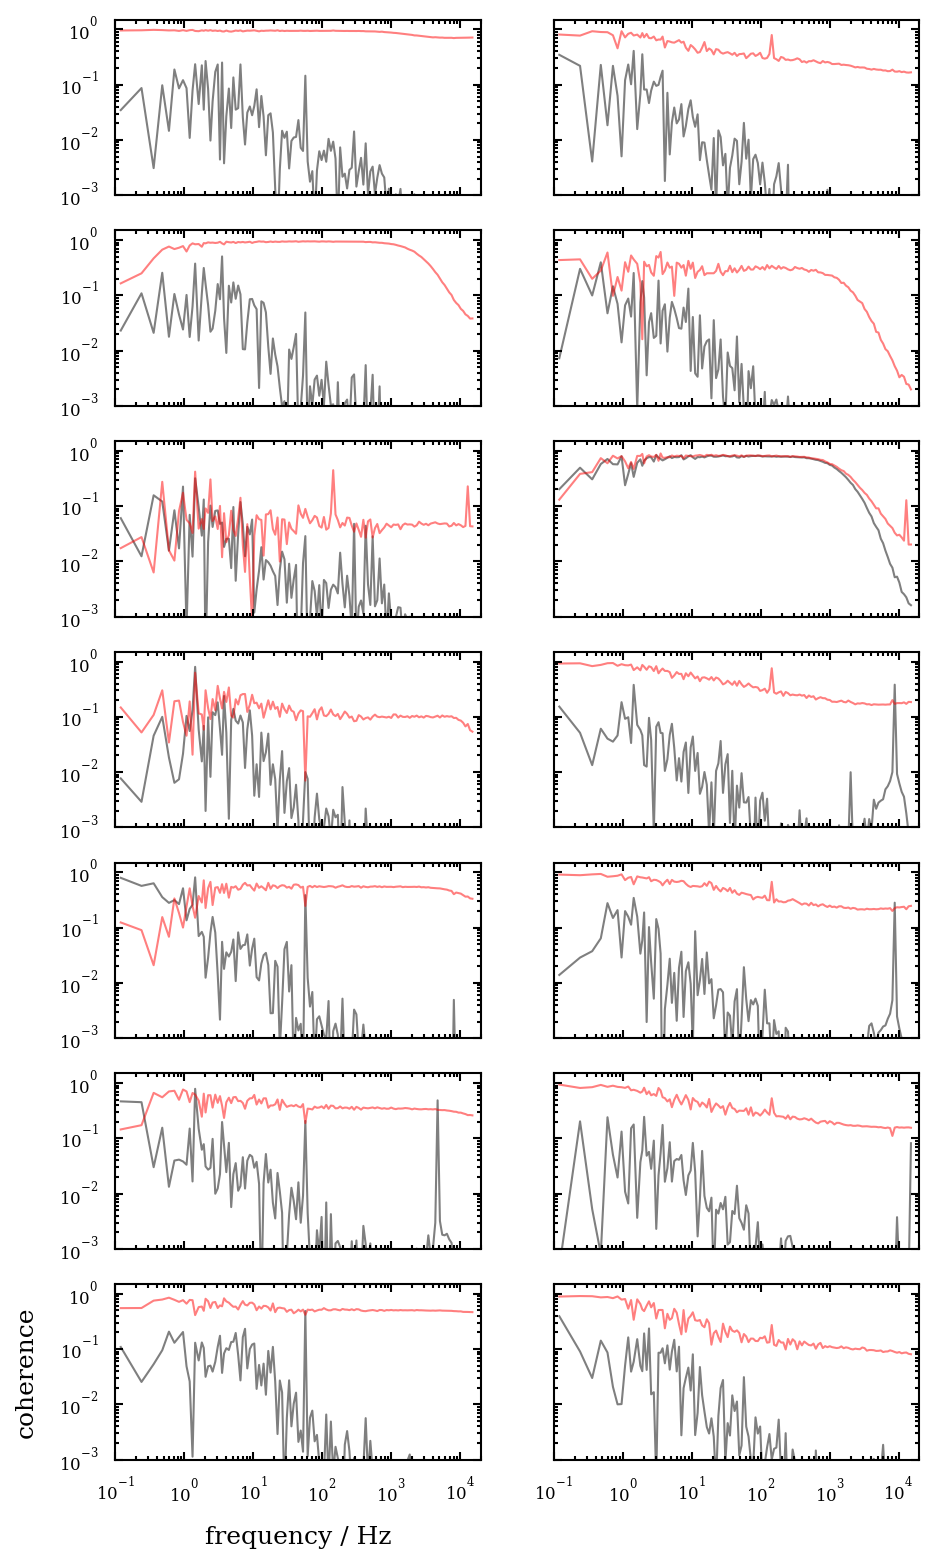

In [9]:
fig, ax = plot_coherence_on_off(on_ss_150, off_ss_150, num_channels=num_channels, num_attenuations=num_attenuations)